In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#importing dataset
df = pd.read_csv('../Healthcare-Diabetes.csv')
df=df.drop('Id',axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [76]:
df=df.drop_duplicates()

In [77]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [78]:
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.64
BloodPressure                                     36                             4.63
SkinThickness                                     229                            29.43
Insulin                                           377                            48.46
BMI                                               11                             1.41
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [79]:
from sklearn.impute import KNNImputer

missing_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
knn_imputer = KNNImputer(n_neighbors=5) 

df[missing_value] = knn_imputer.fit_transform(df[missing_value])

In [80]:
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


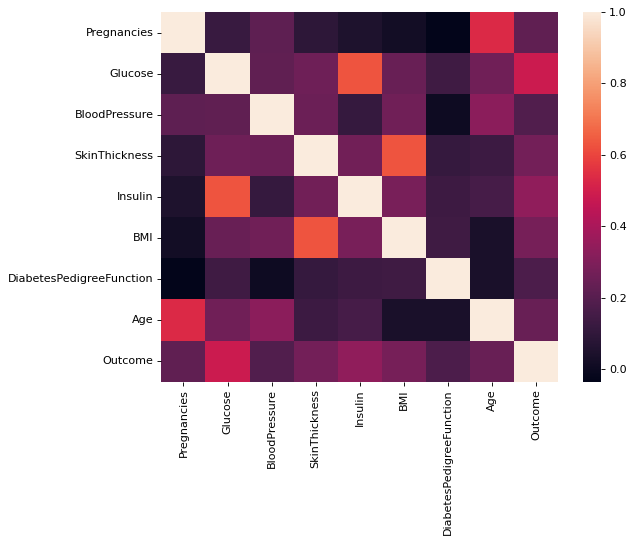

In [81]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

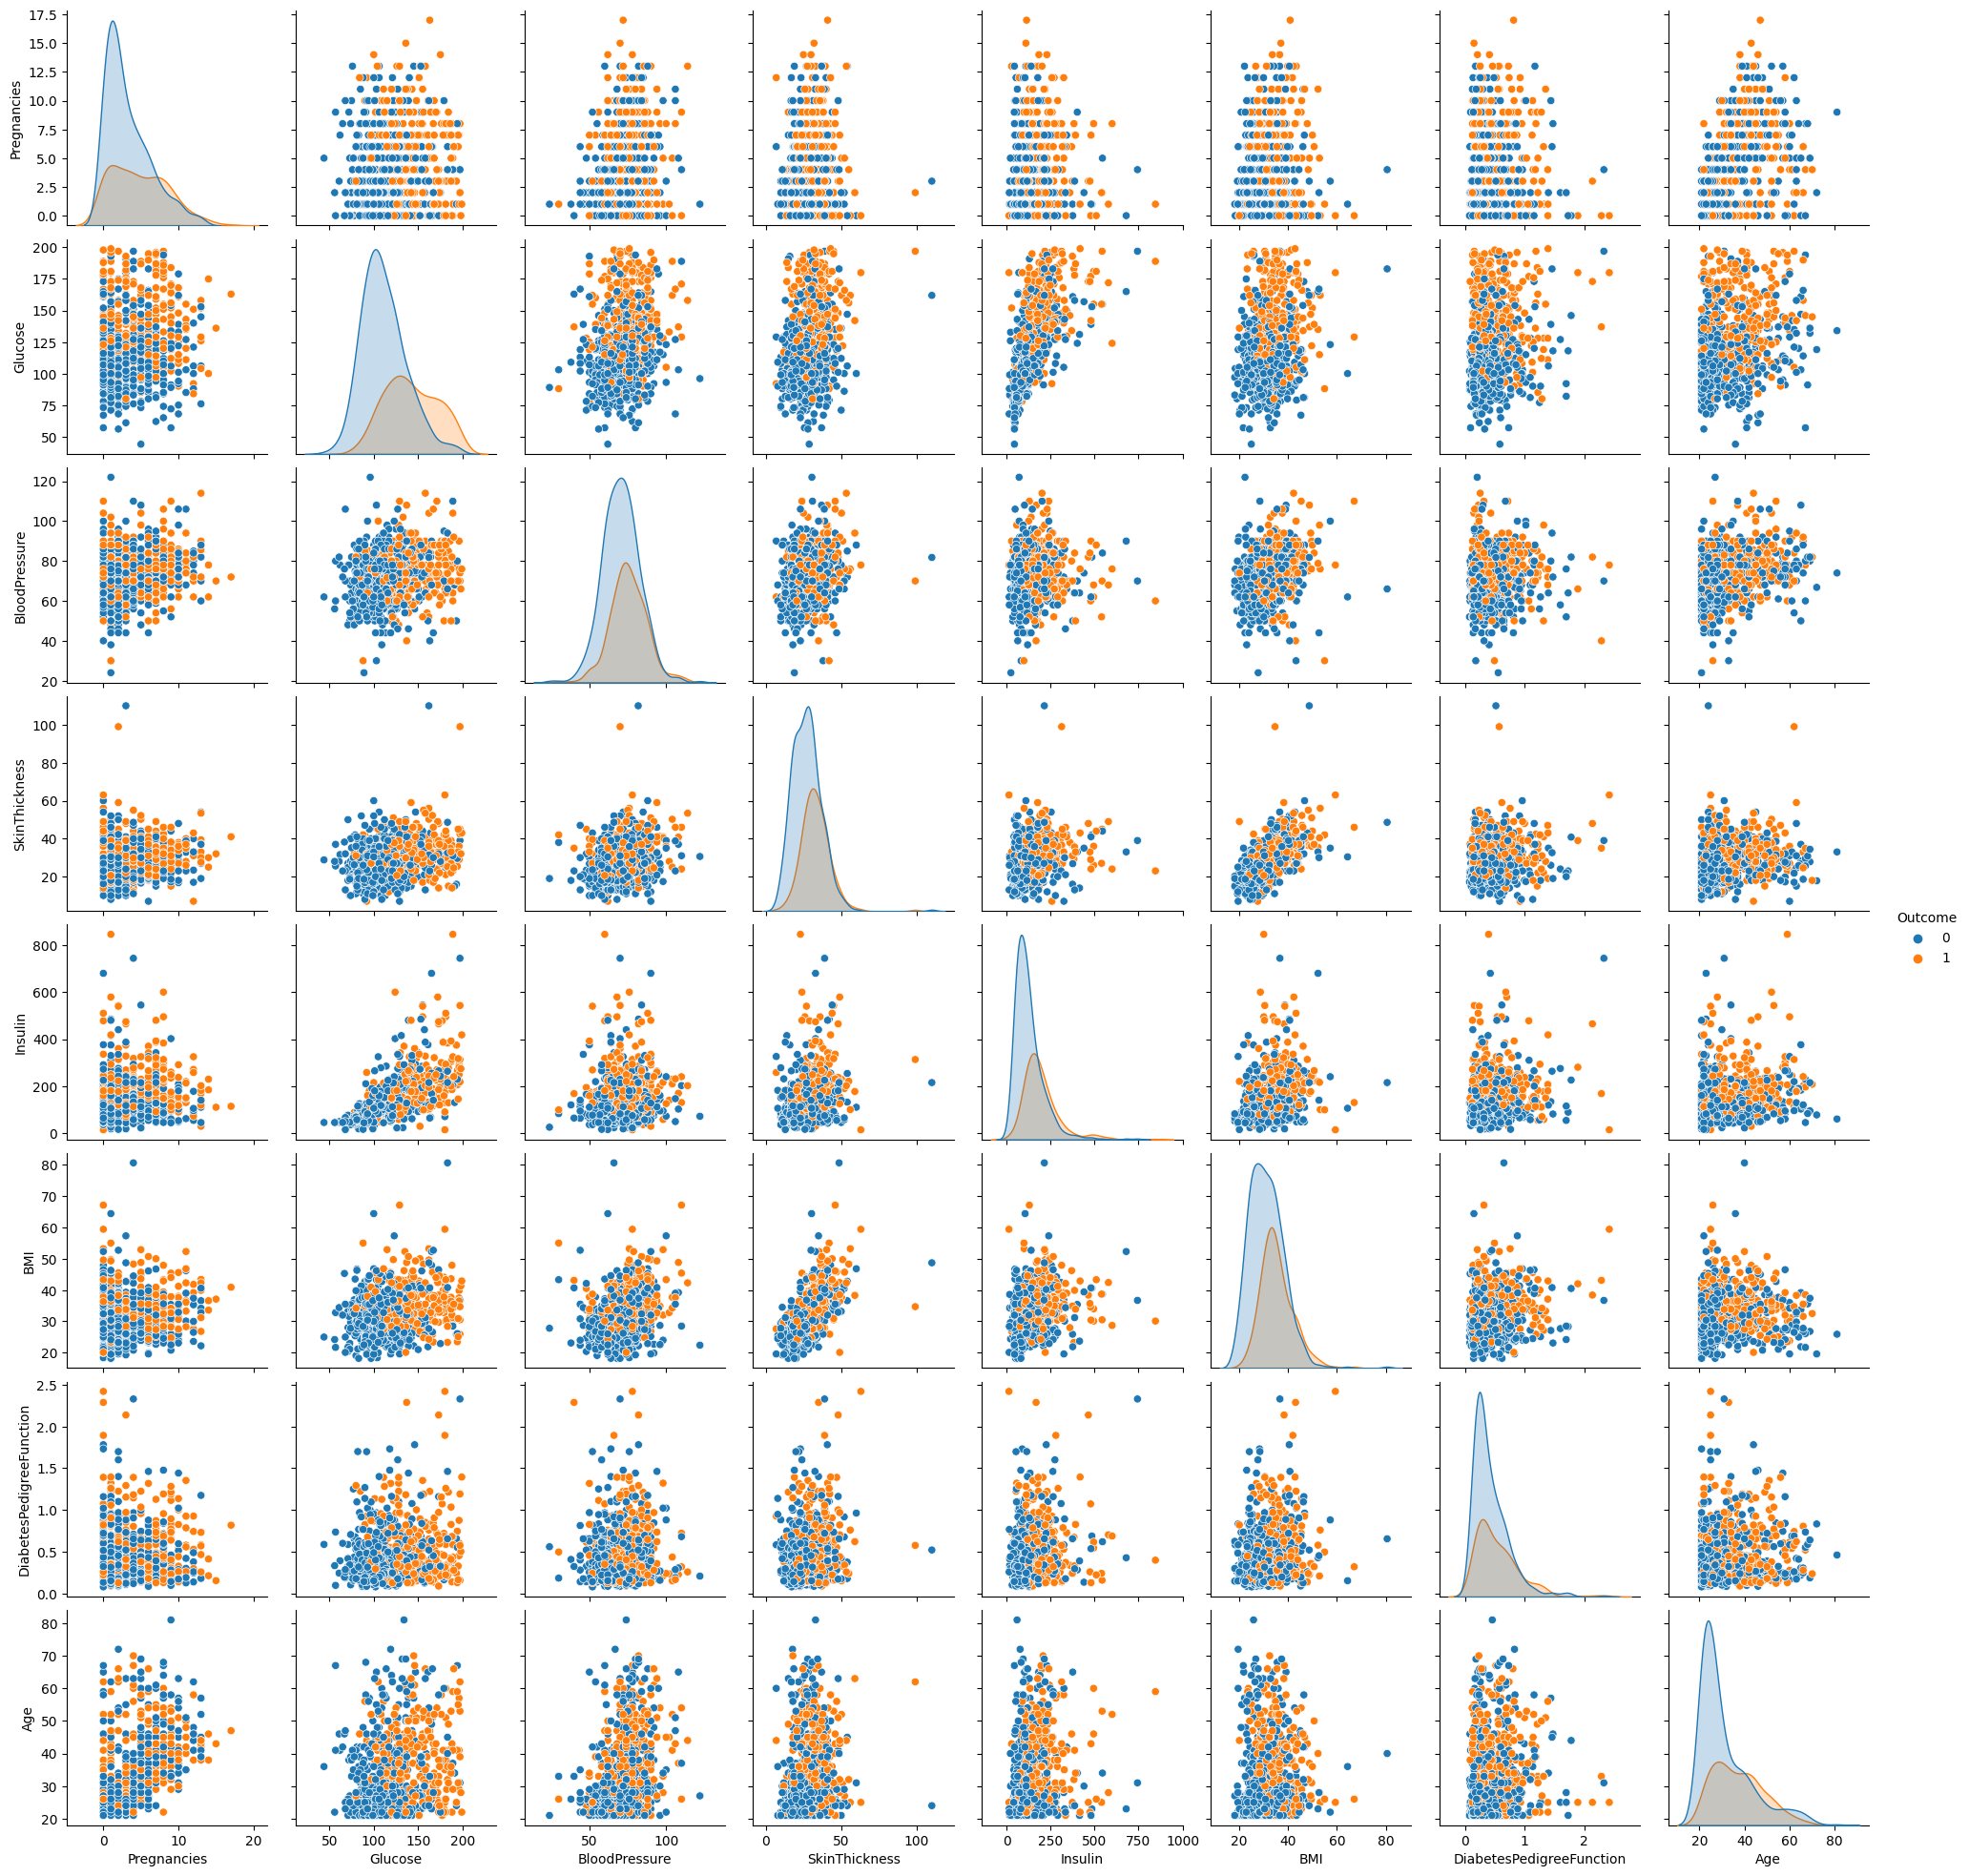

In [82]:
sns.pairplot(df,hue='Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

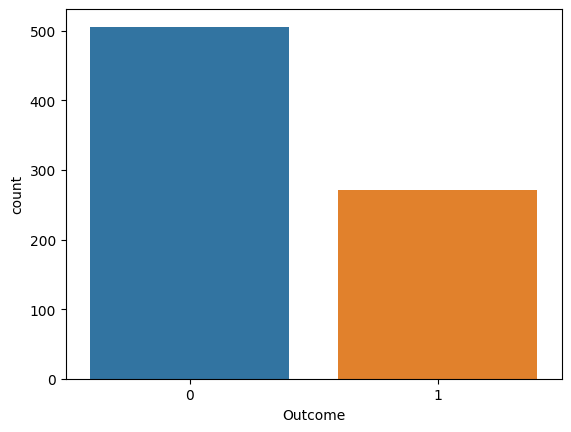

In [83]:
sns.countplot(x="Outcome", data=df)

In [84]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [86]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
# Assuming X_test is your testing feature set
predictions = regressor.predict(X_test)
print(predictions)

[0.12 0.23 0.07 0.67 0.22 0.1  0.36 0.6  0.27 0.12 0.87 0.64 0.36 0.37
 0.42 0.   0.26 0.74 0.16 0.12 0.91 0.02 0.31 0.31 0.03 0.42 0.47 0.46
 0.26 0.39 0.78 0.86 0.32 0.63 0.36 0.84 0.01 0.   0.   0.76 0.4  0.06
 0.12 0.1  0.47 0.77 0.53 0.51 0.13 0.21 0.11 0.75 0.15 0.63 0.03 0.15
 0.05 0.67 0.67 0.03 0.   0.13 0.52 0.08 0.21 0.44 0.32 0.01 0.   0.23
 0.68 0.34 0.1  0.11 0.73 0.74 0.02 0.92 0.61 0.34 0.14 0.28 0.06 0.54
 0.   0.19 0.47 0.58 0.06 0.6  0.4  0.82 0.16 0.78 0.58 0.96 0.   0.41
 0.53 0.36 0.03 0.38 0.52 0.49 0.11 0.42 0.27 0.   0.01 0.02 0.44 0.11
 0.2  0.31 0.65 0.69 0.09 0.03 0.3  0.25 0.33 0.5  0.05 0.51 0.04 0.24
 0.04 0.69 0.26 0.08 0.04 0.08 0.18 0.01 0.47 0.3  0.28 0.15 0.72 0.59
 0.49 0.58 0.95 0.   0.69 0.2  0.44 0.   0.56 0.41 0.03 0.98 0.49 0.24
 0.73 0.03]


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
f1 = f1_score(y_test, predictions.round())

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"F1 Score: {f1}")

Mean Absolute Error: 0.3158333333333333
Mean Squared Error: 0.1633519230769231
R-squared: 0.3006100633356791
F1 Score: 0.6213592233009709


In [89]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training features and target variable
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

joblib.dump(regressor, 'diabetics-prediction-rfr.joblib')

['diabetics-prediction-rfr.joblib']

In [90]:
model = joblib.load('diabetics-prediction-rfr.joblib')

Pregnancies = 2
Glucose = 100
BloodPressure = 90
SkinThickness = 20
Insulin = 75
BMI = 60
DiabetesPedigreeFunction = 0
Age = 20


df = pd.DataFrame({
    'Pregnancies': [Pregnancies],
    'Glucose': [Glucose],
    'BloodPressure': [BloodPressure],
    'SkinThickness': [SkinThickness],
    'Insulin': [Insulin],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
    'Age': [Age]
})

pred = model.predict(df)
print(pred)

[0.2]
